<a href="https://colab.research.google.com/github/franzione1/Big-Data-Text-Analysis-Course/blob/master/big_data_2_2_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nuova sezione

In [ ]:
type(5)

int

In [ ]:
type('Daniele')

str

In [ ]:
a = 0
a = a + 1
a

1

In [ ]:
print(a)

1


In [ ]:
# to define functions in Python you use def
def somma(a, b):
  # and then you need to indent correctly
  return a+b

a = 1
b = 4

print(somma(a,b))

5


In [ ]:
type("Francesco")

str

In [ ]:
type(a/b)

float

In [ ]:
import numpy as np

np.array([1,2,3])

array([1, 2, 3])

In [ ]:
type(np.array([1,2,3]))

numpy.ndarray

In [ ]:
esempio_lista = [1, 2, 5]

In [ ]:
# la List è proprio un type in Python

type(esempio_lista)

list

In [ ]:
# ecco come funzionano gli if

a = 4
b = 5

if (a < 5):
    print("minore")
else:
    print("a è maggiore o uguale")

if (b == 5):
    print("b uguale")
else:
    print("b diverso")

minore
b uguale


In [ ]:
b = 6

if (b == 5):
  print("B è uguale a 5")
else:
  print("B è diverso da 5")

B è diverso da 5


In [ ]:
# operazioni da poter fare sulle liste

listA = [0, 1, 2, 3]

In [ ]:
# Adding element via append
listA.append(4)
listA

[0, 1, 2, 3, 4]

In [ ]:
listA.append(1000)

In [ ]:
listA

[0, 1, 2, 3, 4, 1000]

In [ ]:
# insert di fatto aggiunge ma diversamente dall'append, puoi scegliere dove aggiungere

listA.insert(1, 1001)


In [ ]:
listA

[0, 1001, 1, 2, 3, 4, 1000]

In [ ]:
t = 0
listB = []

# ciclo while
while (t != 4):
  listB.append(t)
  t = t + 1

listB

[0, 1, 2, 3]

In [ ]:
t = 0

# questo è come funziona un for invece
for t in range(5):
  listB.insert(t, t)

listB

[0, 1, 2, 3, 4, 0, 1, 2, 3]

In [ ]:
# questa operazione aggiunge una lista in fila all'altra
listA + listB

[0, 1001, 1, 2, 3, 4, 1000, 0, 1, 2, 3, 4, 0, 1, 2, 3]

In [2]:
import pandas as pd

In [37]:
dataset_ac = pd.read_csv("heart_failure_clinical_records_dataset.csv")

Quante sono le istanze contenute nel dataset?
Il dataset è completo (cioè per ogni
istanza tutti i valori di ogni attributo sono sempre correttamente specificati non esistono “missing values”)?

In [ ]:
# funzione importante di pandas che ci permette di risalire al numero di righe di un dataset e quindi di ISTANZE

dataset_ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# trovo il numero di righe nel mio dataset

dataset_ac.shape[0]

299

I casi raccolti nel dataset sono equamente distribuiti per età?

In [ ]:
dataset_ac.age.values.mean()

60.83389297658862

<Axes: >

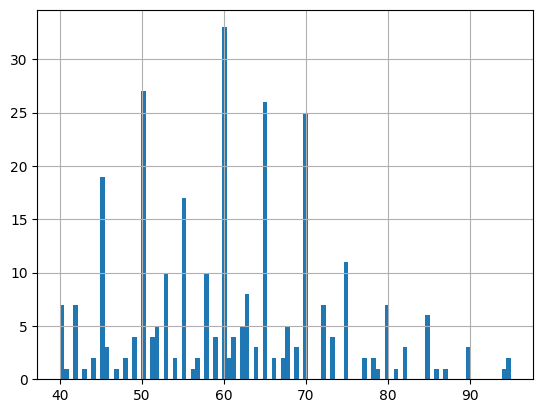

In [ ]:
dataset_ac["age"].hist(bins=100)

In [ ]:
# distribuzione poco omogenea
print(dataset_ac.groupby('age').size())

age
40.000     7
41.000     1
42.000     7
43.000     1
44.000     2
45.000    19
46.000     3
47.000     1
48.000     2
49.000     4
50.000    27
51.000     4
52.000     5
53.000    10
54.000     2
55.000    17
56.000     1
57.000     2
58.000    10
59.000     4
60.000    33
60.667     2
61.000     4
62.000     5
63.000     8
64.000     3
65.000    26
66.000     2
67.000     2
68.000     5
69.000     3
70.000    25
72.000     7
73.000     4
75.000    11
77.000     2
78.000     2
79.000     1
80.000     7
81.000     1
82.000     3
85.000     6
86.000     1
87.000     1
90.000     3
94.000     1
95.000     2
dtype: int64


## Il dataset è bilanciato per quanto riguarda la classe da predire?

<Axes: xlabel='DEATH_EVENT'>

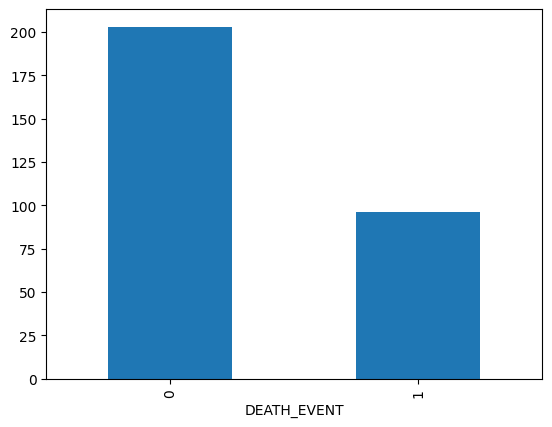

In [ ]:
# la classe da predire è nell'esercizio dopo. Sarebbe il death event, quindi guardiamo come sono distribuiti i casi nel dataset

# RICORDA: 1 morto, 0 vivo

# questa tipologia di funzione plotta e sceglie il numero di colonne automaticamente
dataset_ac["DEATH_EVENT"].value_counts().plot.bar()

In [5]:
from posixpath import join
dataset_ac.groupby(dataset_ac.join()).size()

sex
0    105
1    194
dtype: int64

## Verificare se è vero che ci sono meno decessi tra le donne (sex = 0). Rappresentare graficamente se possibile quanto emerge dai dati.

<Axes: xlabel='sex'>

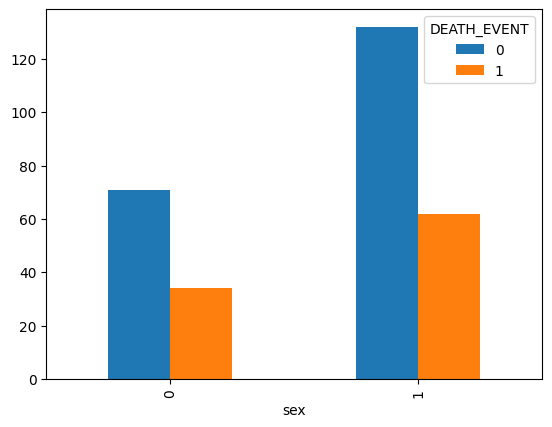

In [14]:
# query per trovare gli uomini
pd.pivot_table(dataset_ac, 'age', index="sex", columns='DEATH_EVENT', aggfunc='count').plot(kind="bar")

In [52]:
# cos'è una tabella pivot? quella che vedi raffigurata qui sopra è un grafico

# per ogni sesso si calcola la percentuale di decessi
# lo fa semplicemente cercando con il group by, ovvero raggruppando per sesso
df = dataset_ac[dataset_ac['DEATH_EVENT']==1]
df.groupby('sex').size()/dataset_ac.groupby('sex').size()


sex
0    0.323810
1    0.319588
dtype: float64

In [42]:
# il group by raggruppa per una categoria e conta. Non necessiti di una query di ricerca per gli uomini
dataset_ac.groupby('sex').size()

sex
0    105
1    194
dtype: int64

In [50]:
df_uomini = dataset_ac.where(dataset_ac['sex'] == 0)

uomini_where = df_uomini.dropna()

print(uomini_where)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
4    65.0      1.0                     160.0       1.0               20.0   
8    65.0      0.0                     157.0       0.0               65.0   
14   49.0      1.0                      80.0       0.0               30.0   
18   70.0      1.0                     125.0       0.0               25.0   
19   48.0      1.0                     582.0       1.0               55.0   
..    ...      ...                       ...       ...                ...   
288  65.0      0.0                     892.0       1.0               35.0   
289  90.0      1.0                     337.0       0.0               38.0   
290  45.0      0.0                     615.0       1.0               55.0   
295  55.0      0.0                    1820.0       0.0               38.0   
296  45.0      0.0                    2060.0       1.0               60.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [51]:
uomini_where.groupby('sex').size()

sex
0.0    105
dtype: int64

## Realizzare una pivot_table in cui rappresentare la percentuale di decessi considerando la variabile age (sulle righe e suddivisa in 5 gruppi), la variabile sex e la variabile smoking (entrambe sulle colonne)